In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

#data_frame = read_csv_834()

data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

In [5]:
data_frame.columns

Index(['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.3', '1.0.4'],
      dtype='object')

In [6]:
data_frame = data_frame[['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.4']]

In [7]:
data_set = create_data_set(data_frame)

In [8]:
for i in data_set:
    print(i)

[40.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
[55.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.]
[39.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[60.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[56.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[71.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
[55.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.]
[80.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[51.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[44.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
[56.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.]
[45.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[50.  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
[50.  2.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.]
[57.  2.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
[42.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
[30.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.]
[52.  1.  0.  

[72.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
[47.  1.  2.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
[45.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[51.  1.  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.]
[55.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[38.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.]
[52.  2.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.]
[70.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[72.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
[89.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[80.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[65.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[42.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[75.  1.  2.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.]
[65.  2.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.]
[70.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.]
[51.  1.  0.  

[35.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[66.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[57.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[48.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.]
[72.  1.  2.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.]
[45.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.]
[45.  2.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.]
[56.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[58.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[67.  1.  2.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.]
[38.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[58.  2.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.]
[60.  1.  2.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[40.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[37.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[55.  1.  2.  

[78.  2.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[89.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.]
[40.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.]
[50.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[42.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
[38.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[55.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[34.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.]
[46.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
[65.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[76.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.]
[50.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.]
[30.  2.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
[50.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[67.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[46.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.]
[60.  1.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[100.   2.   0

[30.  2.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
[70.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.]
[45.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.]
[48.  1.  2.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
[45.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
[67.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[45.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[55.  1.  2.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.]
[48.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.]
[64.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[47.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
[59.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[45.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[72.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.]
[57.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.]
[60.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[30.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[50.  1.  0.  

In [9]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [10]:
len(data_set[0])

14

In [11]:
len(actual_x[0])

13

In [12]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7279 - acc: 0.4053 - val_loss: 0.6958 - val_acc: 0.3095
Epoch 2/200
 - 0s - loss: 0.6854 - acc: 0.5880 - val_loss: 0.6681 - val_acc: 0.6310
Epoch 3/200
 - 0s - loss: 0.6714 - acc: 0.6000 - val_loss: 0.6531 - val_acc: 0.6310
Epoch 4/200
 - 0s - loss: 0.6678 - acc: 0.5987 - val_loss: 0.6497 - val_acc: 0.6310
Epoch 5/200
 - 0s - loss: 0.6669 - acc: 0.6000 - val_loss: 0.6427 - val_acc: 0.6429
Epoch 6/200
 - 0s - loss: 0.6646 - acc: 0.6013 - val_loss: 0.6377 - val_acc: 0.6310
Epoch 7/200
 - 0s - loss: 0.6574 - acc: 0.6053 - val_loss: 0.6034 - val_acc: 0.7143
Epoch 8/200
 - 0s - loss: 0.6498 - acc: 0.6307 - val_loss: 0.6050 - val_acc: 0.6667
Epoch 9/200
 - 0s - loss: 0.6469 - acc: 0.6267 - val_loss: 0.5919 - val_acc: 0.7024
Epoch 10/200
 - 0s - loss: 0.6338 - acc: 0.6560 - val_loss: 0.5578 - val_acc: 0.8095
Epoch 11/200
 - 0s - loss: 0.6325 - acc: 0.6507 - val_loss: 0.5395 - val_acc: 0.7619
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.5834 - acc: 0.7107 - val_loss: 0.4483 - val_acc: 0.7857
Epoch 98/200
 - 0s - loss: 0.5824 - acc: 0.7040 - val_loss: 0.4597 - val_acc: 0.7857
Epoch 99/200
 - 0s - loss: 0.5793 - acc: 0.7067 - val_loss: 0.4672 - val_acc: 0.8095
Epoch 100/200
 - 0s - loss: 0.5831 - acc: 0.6960 - val_loss: 0.4322 - val_acc: 0.8333
Epoch 101/200
 - 0s - loss: 0.5787 - acc: 0.7053 - val_loss: 0.4304 - val_acc: 0.8333
Epoch 102/200
 - 0s - loss: 0.5825 - acc: 0.7040 - val_loss: 0.4392 - val_acc: 0.8214
Epoch 103/200
 - 0s - loss: 0.5804 - acc: 0.6987 - val_loss: 0.4554 - val_acc: 0.7857
Epoch 104/200
 - 0s - loss: 0.5836 - acc: 0.7000 - val_loss: 0.4842 - val_acc: 0.7857
Epoch 105/200
 - 0s - loss: 0.5826 - acc: 0.7027 - val_loss: 0.4518 - val_acc: 0.8690
Epoch 106/200
 - 0s - loss: 0.5828 - acc: 0.6960 - val_loss: 0.4550 - val_acc: 0.7857
Epoch 107/200
 - 0s - loss: 0.5795 - acc: 0.7133 - val_loss: 0.4462 - val_acc: 0.8571
Epoch 108/200
 - 0s - loss: 0.5798 - acc: 0.7107 - val_lo

Epoch 193/200
 - 0s - loss: 0.5717 - acc: 0.7040 - val_loss: 0.4570 - val_acc: 0.8571
Epoch 194/200
 - 0s - loss: 0.5740 - acc: 0.7067 - val_loss: 0.4460 - val_acc: 0.8571
Epoch 195/200
 - 0s - loss: 0.5740 - acc: 0.7080 - val_loss: 0.4531 - val_acc: 0.7857
Epoch 196/200
 - 0s - loss: 0.5743 - acc: 0.7067 - val_loss: 0.4455 - val_acc: 0.8333
Epoch 197/200
 - 0s - loss: 0.5737 - acc: 0.7107 - val_loss: 0.4525 - val_acc: 0.8095
Epoch 198/200
 - 0s - loss: 0.5720 - acc: 0.7027 - val_loss: 0.4479 - val_acc: 0.8571
Epoch 199/200
 - 0s - loss: 0.5752 - acc: 0.7120 - val_loss: 0.4472 - val_acc: 0.8571
Epoch 200/200
 - 0s - loss: 0.5700 - acc: 0.7147 - val_loss: 0.4484 - val_acc: 0.8571


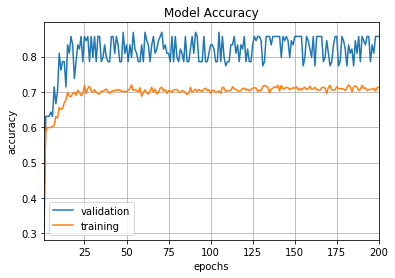

84/84 [==============================] - 0s 77us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.4484322610355559, 0.8571428628194899]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 1.8601 - acc: 0.6107 - val_loss: 0.7003 - val_acc: 0.5476
Epoch 2/200
 - 0s - loss: 0.6622 - acc: 0.6133 - val_loss: 0.7043 - val_acc: 0.5476
Epoch 3/200
 - 0s - loss: 0.6592 - acc: 0.6080 - val_loss: 0.6848 - val_acc: 0.5833
Epoch 4/200
 - 0s - loss: 0.6591 - acc: 0.6160 - val_loss: 0.6879 - val_acc: 0.5595
Epoch 5/200
 - 0s - loss: 0.6566 - acc: 0.6080 - val_loss: 0.7289 - val_acc: 0.5476
Epoch 6/200
 - 0s - loss: 0.6538 - acc: 0.6120 - val_loss: 0.7071 - val_acc: 0.5476
Epoch 7/200
 - 0s - loss: 0.6450 - acc: 0.6267 - val_loss: 0.7253 - val_acc: 0.5476
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5797 - acc: 0.7133 - val_loss: 0.6189 - val_acc: 0.7024
Epoch 94/200
 - 0s - loss: 0.5789 - acc: 0.7053 - val_loss: 0.6230 - val_acc: 0.7024
Epoch 95/200
 - 0s - loss: 0.5810 - acc: 0.7067 - val_loss: 0.6703 - val_acc: 0.6786
Epoch 96/200
 - 0s - loss: 0.5785 - acc: 0.7080 - val_loss: 0.6130 - val_acc: 0.7024
Epoch 97/200
 - 0s - loss: 0.5798 - acc: 0.7120 - val_loss: 0.6162 - val_acc: 0.6905
Epoch 98/200
 - 0s - loss: 0.5781 - acc: 0.7173 - val_loss: 0.5901 - val_acc: 0.7262
Epoch 99/200
 - 0s - loss: 0.5752 - acc: 0.7213 - val_loss: 0.5937 - val_acc: 0.7143
Epoch 100/200
 - 0s - loss: 0.5774 - acc: 0.7133 - val_loss: 0.5850 - val_acc: 0.7262
Epoch 101/200
 - 0s - loss: 0.5757 - acc: 0.7053 - val_loss: 0.6300 - val_acc: 0.7024
Epoch 102/200
 - 0s - loss: 0.5745 - acc: 0.7120 - val_loss: 0.6333 - val_acc: 0.7024
Epoch 103/200
 - 0s - loss: 0.5780 - acc: 0.7173 - val_loss: 0.5884 - val_acc: 0.7381
Epoch 104/200
 - 0s - loss: 0.5727 - acc: 0.7093 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5711 - acc: 0.7320 - val_loss: 0.5889 - val_acc: 0.7500
Epoch 190/200
 - 0s - loss: 0.5738 - acc: 0.7147 - val_loss: 0.6273 - val_acc: 0.6905
Epoch 191/200
 - 0s - loss: 0.5658 - acc: 0.7240 - val_loss: 0.5880 - val_acc: 0.7143
Epoch 192/200
 - 0s - loss: 0.5723 - acc: 0.7147 - val_loss: 0.6129 - val_acc: 0.6905
Epoch 193/200
 - 0s - loss: 0.5740 - acc: 0.7027 - val_loss: 0.5925 - val_acc: 0.7262
Epoch 194/200
 - 0s - loss: 0.5726 - acc: 0.7213 - val_loss: 0.5925 - val_acc: 0.7262
Epoch 195/200
 - 0s - loss: 0.5714 - acc: 0.7080 - val_loss: 0.5851 - val_acc: 0.7143
Epoch 196/200
 - 0s - loss: 0.5657 - acc: 0.7133 - val_loss: 0.5947 - val_acc: 0.7262
Epoch 197/200
 - 0s - loss: 0.5726 - acc: 0.7267 - val_loss: 0.5877 - val_acc: 0.7262
Epoch 198/200
 - 0s - loss: 0.5744 - acc: 0.7080 - val_loss: 0.6032 - val_acc: 0.7143
Epoch 199/200
 - 0s - loss: 0.5742 - acc: 0.7147 - val_loss: 0.5868 - val_acc: 0.7381
Epoch 200/200
 - 0s - loss: 0.5699 - acc: 0.7173 - val

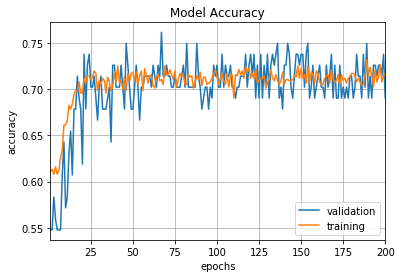

84/84 [==============================] - 0s 146us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6850768781843639, 0.6904761876378741]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 1.3006 - acc: 0.6040 - val_loss: 0.7466 - val_acc: 0.5357
Epoch 2/200
 - 0s - loss: 0.6591 - acc: 0.6173 - val_loss: 0.7105 - val_acc: 0.5238
Epoch 3/200
 - 0s - loss: 0.6524 - acc: 0.6120 - val_loss: 0.8633 - val_acc: 0.5357
Epoch 4/200
 - 0s - loss: 0.6469 - acc: 0.6320 - val_loss: 0.7999 - val_acc: 0.5357
Epoch 5/200
 - 0s - loss: 0.6435 - acc: 0.6187 - val_loss: 0.7442 - val_acc: 0.5357
Epoch 6/200
 - 0s - loss: 0.6410 - acc: 0.6373 - val_loss: 0.7420 - val_acc: 0.5238
Epoch 7/200
 - 0s - loss: 0.6374 - acc: 0.6400 - val_loss: 0.7054 - val_acc: 0.5833
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5664 - acc: 0.7293 - val_loss: 0.8011 - val_acc: 0.5714
Epoch 94/200
 - 0s - loss: 0.5597 - acc: 0.7200 - val_loss: 0.7666 - val_acc: 0.6190
Epoch 95/200
 - 0s - loss: 0.5626 - acc: 0.7253 - val_loss: 0.8497 - val_acc: 0.5833
Epoch 96/200
 - 0s - loss: 0.5662 - acc: 0.7320 - val_loss: 0.7535 - val_acc: 0.6071
Epoch 97/200
 - 0s - loss: 0.5668 - acc: 0.7240 - val_loss: 0.7808 - val_acc: 0.5714
Epoch 98/200
 - 0s - loss: 0.5629 - acc: 0.7347 - val_loss: 0.8021 - val_acc: 0.5714
Epoch 99/200
 - 0s - loss: 0.5604 - acc: 0.7200 - val_loss: 0.7537 - val_acc: 0.6071
Epoch 100/200
 - 0s - loss: 0.5658 - acc: 0.7253 - val_loss: 0.7720 - val_acc: 0.5952
Epoch 101/200
 - 0s - loss: 0.5651 - acc: 0.7413 - val_loss: 0.7991 - val_acc: 0.5595
Epoch 102/200
 - 0s - loss: 0.5618 - acc: 0.7147 - val_loss: 0.7971 - val_acc: 0.5595
Epoch 103/200
 - 0s - loss: 0.5654 - acc: 0.7280 - val_loss: 0.7588 - val_acc: 0.5952
Epoch 104/200
 - 0s - loss: 0.5636 - acc: 0.7320 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5582 - acc: 0.7160 - val_loss: 0.7570 - val_acc: 0.6071
Epoch 190/200
 - 0s - loss: 0.5565 - acc: 0.7280 - val_loss: 0.8269 - val_acc: 0.5595
Epoch 191/200
 - 0s - loss: 0.5635 - acc: 0.7307 - val_loss: 0.7767 - val_acc: 0.5952
Epoch 192/200
 - 0s - loss: 0.5612 - acc: 0.7387 - val_loss: 0.7770 - val_acc: 0.5952
Epoch 193/200
 - 0s - loss: 0.5610 - acc: 0.7293 - val_loss: 0.7659 - val_acc: 0.5833
Epoch 194/200
 - 0s - loss: 0.5628 - acc: 0.7293 - val_loss: 0.7556 - val_acc: 0.6071
Epoch 195/200
 - 0s - loss: 0.5601 - acc: 0.7187 - val_loss: 0.7769 - val_acc: 0.5952
Epoch 196/200
 - 0s - loss: 0.5620 - acc: 0.7240 - val_loss: 0.7865 - val_acc: 0.5714
Epoch 197/200
 - 0s - loss: 0.5642 - acc: 0.7200 - val_loss: 0.7992 - val_acc: 0.5714
Epoch 198/200
 - 0s - loss: 0.5616 - acc: 0.7267 - val_loss: 0.7748 - val_acc: 0.5952
Epoch 199/200
 - 0s - loss: 0.5601 - acc: 0.7173 - val_loss: 0.7621 - val_acc: 0.5952
Epoch 200/200
 - 0s - loss: 0.5644 - acc: 0.7213 - val

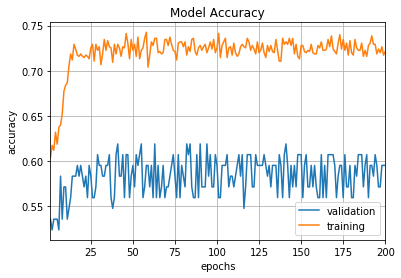

84/84 [==============================] - 0s 104us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.7736916485286894, 0.5952380923997789]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6989 - acc: 0.5240 - val_loss: 0.6756 - val_acc: 0.6548
Epoch 2/200
 - 0s - loss: 0.6773 - acc: 0.5960 - val_loss: 0.6463 - val_acc: 0.6548
Epoch 3/200
 - 0s - loss: 0.6697 - acc: 0.5960 - val_loss: 0.6413 - val_acc: 0.6548
Epoch 4/200
 - 0s - loss: 0.6698 - acc: 0.5960 - val_loss: 0.6398 - val_acc: 0.6548
Epoch 5/200
 - 0s - loss: 0.6675 - acc: 0.5960 - val_loss: 0.6445 - val_acc: 0.6548
Epoch 6/200
 - 0s - loss: 0.6675 - acc: 0.5960 - val_loss: 0.6366 - val_acc: 0.6548
Epoch 7/200
 - 0s - loss: 0.6659 - acc: 0.5960 - val_loss: 0.6384 - val_acc: 0.6548
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5804 - acc: 0.7107 - val_loss: 0.5652 - val_acc: 0.7500
Epoch 94/200
 - 0s - loss: 0.5769 - acc: 0.7133 - val_loss: 0.5753 - val_acc: 0.7619
Epoch 95/200
 - 0s - loss: 0.5798 - acc: 0.7120 - val_loss: 0.5620 - val_acc: 0.7381
Epoch 96/200
 - 0s - loss: 0.5758 - acc: 0.7227 - val_loss: 0.5652 - val_acc: 0.7619
Epoch 97/200
 - 0s - loss: 0.5782 - acc: 0.6987 - val_loss: 0.5695 - val_acc: 0.7738
Epoch 98/200
 - 0s - loss: 0.5778 - acc: 0.7120 - val_loss: 0.5609 - val_acc: 0.7500
Epoch 99/200
 - 0s - loss: 0.5799 - acc: 0.7093 - val_loss: 0.5696 - val_acc: 0.7619
Epoch 100/200
 - 0s - loss: 0.5760 - acc: 0.7133 - val_loss: 0.5614 - val_acc: 0.7500
Epoch 101/200
 - 0s - loss: 0.5778 - acc: 0.7147 - val_loss: 0.5803 - val_acc: 0.7619
Epoch 102/200
 - 0s - loss: 0.5797 - acc: 0.7080 - val_loss: 0.5634 - val_acc: 0.7619
Epoch 103/200
 - 0s - loss: 0.5721 - acc: 0.7227 - val_loss: 0.5810 - val_acc: 0.7619
Epoch 104/200
 - 0s - loss: 0.5793 - acc: 0.7080 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5747 - acc: 0.7213 - val_loss: 0.5738 - val_acc: 0.7738
Epoch 190/200
 - 0s - loss: 0.5748 - acc: 0.7040 - val_loss: 0.5657 - val_acc: 0.7381
Epoch 191/200
 - 0s - loss: 0.5753 - acc: 0.7293 - val_loss: 0.5612 - val_acc: 0.7500
Epoch 192/200
 - 0s - loss: 0.5752 - acc: 0.7093 - val_loss: 0.5630 - val_acc: 0.7381
Epoch 193/200
 - 0s - loss: 0.5737 - acc: 0.7067 - val_loss: 0.5682 - val_acc: 0.7500
Epoch 194/200
 - 0s - loss: 0.5758 - acc: 0.7000 - val_loss: 0.5627 - val_acc: 0.7381
Epoch 195/200
 - 0s - loss: 0.5766 - acc: 0.7133 - val_loss: 0.5611 - val_acc: 0.7500
Epoch 196/200
 - 0s - loss: 0.5761 - acc: 0.7080 - val_loss: 0.5561 - val_acc: 0.7500
Epoch 197/200
 - 0s - loss: 0.5762 - acc: 0.7120 - val_loss: 0.5618 - val_acc: 0.7500
Epoch 198/200
 - 0s - loss: 0.5735 - acc: 0.7173 - val_loss: 0.5577 - val_acc: 0.7500
Epoch 199/200
 - 0s - loss: 0.5769 - acc: 0.7173 - val_loss: 0.5596 - val_acc: 0.7500
Epoch 200/200
 - 0s - loss: 0.5722 - acc: 0.7267 - val

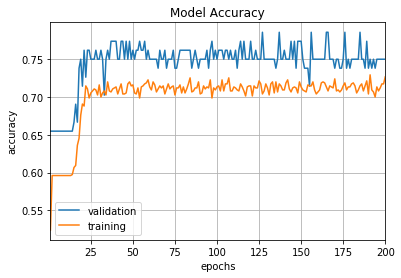

84/84 [==============================] - 0s 125us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5790244880176726, 0.7500000056766328]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6594 - acc: 0.6072 - val_loss: 0.6554 - val_acc: 0.5542
Epoch 2/200
 - 0s - loss: 0.6430 - acc: 0.6125 - val_loss: 0.6686 - val_acc: 0.5542
Epoch 3/200
 - 0s - loss: 0.6398 - acc: 0.6205 - val_loss: 0.6388 - val_acc: 0.6145
Epoch 4/200
 - 0s - loss: 0.6338 - acc: 0.6312 - val_loss: 0.6514 - val_acc: 0.6627
Epoch 5/200
 - 0s - loss: 0.6264 - acc: 0.6538 - val_loss: 0.6268 - val_acc: 0.6024
Epoch 6/200
 - 0s - loss: 0.6236 - acc: 0.6698 - val_loss: 0.6351 - val_acc: 0.6867
Epoch 7/200
 - 0s - loss: 0.6225 - acc: 0.6591 - val_loss: 0.6299 - val_acc: 0.6265
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5766 - acc: 0.7190 - val_loss: 0.5675 - val_acc: 0.7108
Epoch 94/200
 - 0s - loss: 0.5801 - acc: 0.7190 - val_loss: 0.5822 - val_acc: 0.6867
Epoch 95/200
 - 0s - loss: 0.5791 - acc: 0.7204 - val_loss: 0.6373 - val_acc: 0.6145
Epoch 96/200
 - 0s - loss: 0.5766 - acc: 0.7177 - val_loss: 0.5699 - val_acc: 0.6867
Epoch 97/200
 - 0s - loss: 0.5729 - acc: 0.7217 - val_loss: 0.5737 - val_acc: 0.7470
Epoch 98/200
 - 0s - loss: 0.5761 - acc: 0.7230 - val_loss: 0.5734 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5774 - acc: 0.7124 - val_loss: 0.5956 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.5759 - acc: 0.7150 - val_loss: 0.5999 - val_acc: 0.6747
Epoch 101/200
 - 0s - loss: 0.5756 - acc: 0.7270 - val_loss: 0.5998 - val_acc: 0.6506
Epoch 102/200
 - 0s - loss: 0.5753 - acc: 0.7324 - val_loss: 0.5986 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.5780 - acc: 0.7217 - val_loss: 0.5797 - val_acc: 0.6747
Epoch 104/200
 - 0s - loss: 0.5777 - acc: 0.7177 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5712 - acc: 0.7284 - val_loss: 0.6425 - val_acc: 0.5783
Epoch 190/200
 - 0s - loss: 0.5765 - acc: 0.7177 - val_loss: 0.6020 - val_acc: 0.6627
Epoch 191/200
 - 0s - loss: 0.5757 - acc: 0.7284 - val_loss: 0.6159 - val_acc: 0.6145
Epoch 192/200
 - 0s - loss: 0.5723 - acc: 0.7244 - val_loss: 0.6017 - val_acc: 0.6627
Epoch 193/200
 - 0s - loss: 0.5705 - acc: 0.7284 - val_loss: 0.5830 - val_acc: 0.7229
Epoch 194/200
 - 0s - loss: 0.5690 - acc: 0.7337 - val_loss: 0.6274 - val_acc: 0.6145
Epoch 195/200
 - 0s - loss: 0.5770 - acc: 0.7324 - val_loss: 0.6031 - val_acc: 0.6627
Epoch 196/200
 - 0s - loss: 0.5715 - acc: 0.7403 - val_loss: 0.5861 - val_acc: 0.7108
Epoch 197/200
 - 0s - loss: 0.5721 - acc: 0.7297 - val_loss: 0.5780 - val_acc: 0.6867
Epoch 198/200
 - 0s - loss: 0.5724 - acc: 0.7217 - val_loss: 0.6029 - val_acc: 0.6627
Epoch 199/200
 - 0s - loss: 0.5739 - acc: 0.7417 - val_loss: 0.5899 - val_acc: 0.6867
Epoch 200/200
 - 0s - loss: 0.5730 - acc: 0.7324 - val

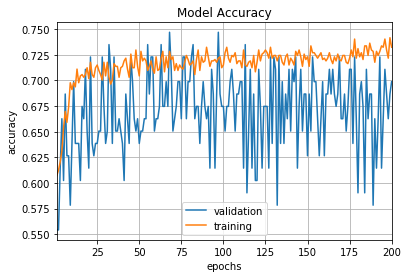

83/83 [==============================] - 0s 60us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5830014111047768, 0.698795182159148]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7027 - acc: 0.5952 - val_loss: 0.6555 - val_acc: 0.6747
Epoch 2/200
 - 0s - loss: 0.6666 - acc: 0.5965 - val_loss: 0.6342 - val_acc: 0.6627
Epoch 3/200
 - 0s - loss: 0.6633 - acc: 0.5952 - val_loss: 0.6518 - val_acc: 0.6988
Epoch 4/200
 - 0s - loss: 0.6574 - acc: 0.5992 - val_loss: 0.6258 - val_acc: 0.6627
Epoch 5/200
 - 0s - loss: 0.6556 - acc: 0.6005 - val_loss: 0.6203 - val_acc: 0.6627
Epoch 6/200
 - 0s - loss: 0.6511 - acc: 0.6138 - val_loss: 0.6172 - val_acc: 0.6627
Epoch 7/200
 - 0s - loss: 0.6426 - acc: 0.6232 - val_loss: 0.6318 - val_acc: 0.7108
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.5812 - acc: 0.7164 - val_loss: 0.5993 - val_acc: 0.7349
Epoch 94/200
 - 0s - loss: 0.5792 - acc: 0.7177 - val_loss: 0.6353 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5812 - acc: 0.7190 - val_loss: 0.6164 - val_acc: 0.7349
Epoch 96/200
 - 0s - loss: 0.5794 - acc: 0.7150 - val_loss: 0.6060 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5785 - acc: 0.7097 - val_loss: 0.6629 - val_acc: 0.5904
Epoch 98/200
 - 0s - loss: 0.5808 - acc: 0.7177 - val_loss: 0.6320 - val_acc: 0.6386
Epoch 99/200
 - 0s - loss: 0.5802 - acc: 0.7137 - val_loss: 0.5971 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.5776 - acc: 0.7310 - val_loss: 0.6408 - val_acc: 0.6024
Epoch 101/200
 - 0s - loss: 0.5743 - acc: 0.7164 - val_loss: 0.6003 - val_acc: 0.6747
Epoch 102/200
 - 0s - loss: 0.5821 - acc: 0.7057 - val_loss: 0.6142 - val_acc: 0.7349
Epoch 103/200
 - 0s - loss: 0.5824 - acc: 0.7111 - val_loss: 0.5989 - val_acc: 0.6747
Epoch 104/200
 - 0s - loss: 0.5763 - acc: 0.7284 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5799 - acc: 0.7150 - val_loss: 0.6308 - val_acc: 0.6024
Epoch 190/200
 - 0s - loss: 0.5778 - acc: 0.7324 - val_loss: 0.6040 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5757 - acc: 0.7177 - val_loss: 0.6113 - val_acc: 0.6747
Epoch 192/200
 - 0s - loss: 0.5785 - acc: 0.7217 - val_loss: 0.5991 - val_acc: 0.6747
Epoch 193/200
 - 0s - loss: 0.5756 - acc: 0.7230 - val_loss: 0.6330 - val_acc: 0.7349
Epoch 194/200
 - 0s - loss: 0.5795 - acc: 0.7097 - val_loss: 0.6385 - val_acc: 0.6024
Epoch 195/200
 - 0s - loss: 0.5786 - acc: 0.7230 - val_loss: 0.5984 - val_acc: 0.7108
Epoch 196/200
 - 0s - loss: 0.5758 - acc: 0.7150 - val_loss: 0.6099 - val_acc: 0.7349
Epoch 197/200
 - 0s - loss: 0.5807 - acc: 0.7124 - val_loss: 0.6290 - val_acc: 0.6024
Epoch 198/200
 - 0s - loss: 0.5763 - acc: 0.7204 - val_loss: 0.6093 - val_acc: 0.7349
Epoch 199/200
 - 0s - loss: 0.5747 - acc: 0.7177 - val_loss: 0.6252 - val_acc: 0.7349
Epoch 200/200
 - 0s - loss: 0.5764 - acc: 0.7217 - val

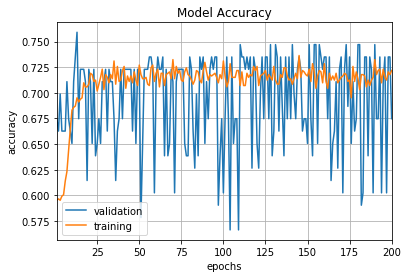

83/83 [==============================] - 0s 121us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5988549389034868, 0.6746987930263382]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.8055 - acc: 0.5300 - val_loss: 0.6792 - val_acc: 0.6988
Epoch 2/200
 - 0s - loss: 0.6825 - acc: 0.6258 - val_loss: 0.6736 - val_acc: 0.6506
Epoch 3/200
 - 0s - loss: 0.6790 - acc: 0.6125 - val_loss: 0.6817 - val_acc: 0.5663
Epoch 4/200
 - 0s - loss: 0.6740 - acc: 0.6152 - val_loss: 0.6667 - val_acc: 0.6627
Epoch 5/200
 - 0s - loss: 0.6704 - acc: 0.6258 - val_loss: 0.6605 - val_acc: 0.6265
Epoch 6/200
 - 0s - loss: 0.6667 - acc: 0.6258 - val_loss: 0.6598 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6635 - acc: 0.6258 - val_loss: 0.6880 - val_acc: 0.5904
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5698 - acc: 0.7190 - val_loss: 0.6165 - val_acc: 0.6867
Epoch 94/200
 - 0s - loss: 0.5665 - acc: 0.7377 - val_loss: 0.7352 - val_acc: 0.5663
Epoch 95/200
 - 0s - loss: 0.5787 - acc: 0.7124 - val_loss: 0.6455 - val_acc: 0.6386
Epoch 96/200
 - 0s - loss: 0.5747 - acc: 0.7257 - val_loss: 0.6199 - val_acc: 0.6988
Epoch 97/200
 - 0s - loss: 0.5769 - acc: 0.7217 - val_loss: 0.6364 - val_acc: 0.6386
Epoch 98/200
 - 0s - loss: 0.5774 - acc: 0.7204 - val_loss: 0.6085 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5782 - acc: 0.7031 - val_loss: 0.6669 - val_acc: 0.6024
Epoch 100/200
 - 0s - loss: 0.5745 - acc: 0.7084 - val_loss: 0.6128 - val_acc: 0.6988
Epoch 101/200
 - 0s - loss: 0.5768 - acc: 0.7150 - val_loss: 0.6406 - val_acc: 0.6386
Epoch 102/200
 - 0s - loss: 0.5692 - acc: 0.7257 - val_loss: 0.6134 - val_acc: 0.6988
Epoch 103/200
 - 0s - loss: 0.5709 - acc: 0.7257 - val_loss: 0.6092 - val_acc: 0.7108
Epoch 104/200
 - 0s - loss: 0.5734 - acc: 0.7257 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5695 - acc: 0.7204 - val_loss: 0.6124 - val_acc: 0.6988
Epoch 190/200
 - 0s - loss: 0.5657 - acc: 0.7284 - val_loss: 0.6284 - val_acc: 0.6386
Epoch 191/200
 - 0s - loss: 0.5674 - acc: 0.7324 - val_loss: 0.6789 - val_acc: 0.6024
Epoch 192/200
 - 0s - loss: 0.5626 - acc: 0.7310 - val_loss: 0.6169 - val_acc: 0.6627
Epoch 193/200
 - 0s - loss: 0.5694 - acc: 0.7124 - val_loss: 0.6119 - val_acc: 0.6988
Epoch 194/200
 - 0s - loss: 0.5718 - acc: 0.7257 - val_loss: 0.6167 - val_acc: 0.6747
Epoch 195/200
 - 0s - loss: 0.5649 - acc: 0.7217 - val_loss: 0.6158 - val_acc: 0.6867
Epoch 196/200
 - 0s - loss: 0.5643 - acc: 0.7417 - val_loss: 0.6165 - val_acc: 0.6747
Epoch 197/200
 - 0s - loss: 0.5662 - acc: 0.7217 - val_loss: 0.6628 - val_acc: 0.6024
Epoch 198/200
 - 0s - loss: 0.5632 - acc: 0.7297 - val_loss: 0.6174 - val_acc: 0.6867
Epoch 199/200
 - 0s - loss: 0.5687 - acc: 0.7204 - val_loss: 0.6143 - val_acc: 0.6988
Epoch 200/200
 - 0s - loss: 0.5661 - acc: 0.7244 - val

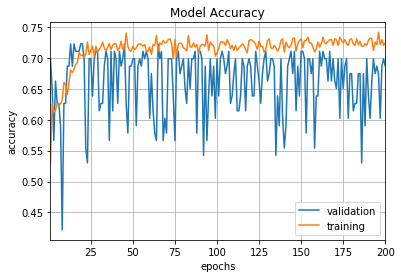

83/83 [==============================] - 0s 65us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6165688059416162, 0.6867469857974224]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6791 - acc: 0.5752 - val_loss: 0.7065 - val_acc: 0.4819
Epoch 2/200
 - 0s - loss: 0.6635 - acc: 0.5939 - val_loss: 0.6587 - val_acc: 0.6145
Epoch 3/200
 - 0s - loss: 0.6611 - acc: 0.6099 - val_loss: 0.6501 - val_acc: 0.6506
Epoch 4/200
 - 0s - loss: 0.6579 - acc: 0.6019 - val_loss: 0.6308 - val_acc: 0.6145
Epoch 5/200
 - 0s - loss: 0.6545 - acc: 0.6099 - val_loss: 0.6562 - val_acc: 0.6145
Epoch 6/200
 - 0s - loss: 0.6543 - acc: 0.6072 - val_loss: 0.6321 - val_acc: 0.6145
Epoch 7/200
 - 0s - loss: 0.6483 - acc: 0.6178 - val_loss: 0.6170 - val_acc: 0.6265
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5883 - acc: 0.7057 - val_loss: 0.5451 - val_acc: 0.7590
Epoch 94/200
 - 0s - loss: 0.5830 - acc: 0.7177 - val_loss: 0.5519 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5841 - acc: 0.7164 - val_loss: 0.5978 - val_acc: 0.6627
Epoch 96/200
 - 0s - loss: 0.5864 - acc: 0.7177 - val_loss: 0.5446 - val_acc: 0.7590
Epoch 97/200
 - 0s - loss: 0.5863 - acc: 0.7124 - val_loss: 0.5431 - val_acc: 0.7470
Epoch 98/200
 - 0s - loss: 0.5829 - acc: 0.7124 - val_loss: 0.7142 - val_acc: 0.5904
Epoch 99/200
 - 0s - loss: 0.5870 - acc: 0.6991 - val_loss: 0.5444 - val_acc: 0.7470
Epoch 100/200
 - 0s - loss: 0.5841 - acc: 0.7071 - val_loss: 0.5633 - val_acc: 0.6988
Epoch 101/200
 - 0s - loss: 0.5850 - acc: 0.7111 - val_loss: 0.5486 - val_acc: 0.7349
Epoch 102/200
 - 0s - loss: 0.5852 - acc: 0.7150 - val_loss: 0.5560 - val_acc: 0.7229
Epoch 103/200
 - 0s - loss: 0.5865 - acc: 0.6977 - val_loss: 0.5542 - val_acc: 0.7229
Epoch 104/200
 - 0s - loss: 0.5871 - acc: 0.7164 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5818 - acc: 0.7057 - val_loss: 0.5467 - val_acc: 0.7229
Epoch 190/200
 - 0s - loss: 0.5831 - acc: 0.7044 - val_loss: 0.5714 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5807 - acc: 0.7137 - val_loss: 0.5434 - val_acc: 0.7590
Epoch 192/200
 - 0s - loss: 0.5782 - acc: 0.7230 - val_loss: 0.5462 - val_acc: 0.7229
Epoch 193/200
 - 0s - loss: 0.5782 - acc: 0.7137 - val_loss: 0.5523 - val_acc: 0.7349
Epoch 194/200
 - 0s - loss: 0.5842 - acc: 0.7017 - val_loss: 0.6012 - val_acc: 0.6627
Epoch 195/200
 - 0s - loss: 0.5841 - acc: 0.7111 - val_loss: 0.5445 - val_acc: 0.7229
Epoch 196/200
 - 0s - loss: 0.5799 - acc: 0.7137 - val_loss: 0.5428 - val_acc: 0.7711
Epoch 197/200
 - 0s - loss: 0.5794 - acc: 0.7097 - val_loss: 0.5569 - val_acc: 0.7229
Epoch 198/200
 - 0s - loss: 0.5871 - acc: 0.7057 - val_loss: 0.5417 - val_acc: 0.7470
Epoch 199/200
 - 0s - loss: 0.5823 - acc: 0.7111 - val_loss: 0.5800 - val_acc: 0.6988
Epoch 200/200
 - 0s - loss: 0.5822 - acc: 0.7097 - val

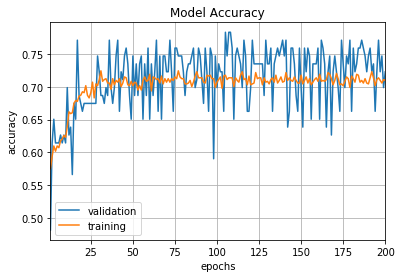

83/83 [==============================] - 0s 187us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5475145459893238, 0.7228915641106755]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 0.6692 - acc: 0.5912 - val_loss: 0.6722 - val_acc: 0.5663
Epoch 2/200
 - 0s - loss: 0.6600 - acc: 0.6059 - val_loss: 0.6812 - val_acc: 0.5663
Epoch 3/200
 - 0s - loss: 0.6592 - acc: 0.6059 - val_loss: 0.6740 - val_acc: 0.5663
Epoch 4/200
 - 0s - loss: 0.6571 - acc: 0.6059 - val_loss: 0.6746 - val_acc: 0.5663
Epoch 5/200
 - 0s - loss: 0.6560 - acc: 0.6059 - val_loss: 0.6715 - val_acc: 0.5663
Epoch 6/200
 - 0s - loss: 0.6546 - acc: 0.6059 - val_loss: 0.6718 - val_acc: 0.5663
Epoch 7/200
 - 0s - loss: 0.6515 - acc: 0.6059 - val_loss: 0.6687 - val_acc: 0.5663
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5630 - acc: 0.7337 - val_loss: 0.6830 - val_acc: 0.6024
Epoch 94/200
 - 0s - loss: 0.5640 - acc: 0.7270 - val_loss: 0.6992 - val_acc: 0.5904
Epoch 95/200
 - 0s - loss: 0.5672 - acc: 0.7177 - val_loss: 0.6572 - val_acc: 0.6145
Epoch 96/200
 - 0s - loss: 0.5579 - acc: 0.7324 - val_loss: 0.6763 - val_acc: 0.6627
Epoch 97/200
 - 0s - loss: 0.5607 - acc: 0.7244 - val_loss: 0.6582 - val_acc: 0.6265
Epoch 98/200
 - 0s - loss: 0.5658 - acc: 0.7284 - val_loss: 0.6809 - val_acc: 0.6386
Epoch 99/200
 - 0s - loss: 0.5635 - acc: 0.7284 - val_loss: 0.6654 - val_acc: 0.6024
Epoch 100/200
 - 0s - loss: 0.5631 - acc: 0.7337 - val_loss: 0.6603 - val_acc: 0.6265
Epoch 101/200
 - 0s - loss: 0.5663 - acc: 0.7217 - val_loss: 0.6596 - val_acc: 0.6386
Epoch 102/200
 - 0s - loss: 0.5646 - acc: 0.7204 - val_loss: 0.6674 - val_acc: 0.6265
Epoch 103/200
 - 0s - loss: 0.5659 - acc: 0.7230 - val_loss: 0.6630 - val_acc: 0.6265
Epoch 104/200
 - 0s - loss: 0.5658 - acc: 0.7270 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5570 - acc: 0.7364 - val_loss: 0.6786 - val_acc: 0.6265
Epoch 190/200
 - 0s - loss: 0.5579 - acc: 0.7284 - val_loss: 0.6939 - val_acc: 0.5904
Epoch 191/200
 - 0s - loss: 0.5602 - acc: 0.7270 - val_loss: 0.6735 - val_acc: 0.6024
Epoch 192/200
 - 0s - loss: 0.5582 - acc: 0.7217 - val_loss: 0.6665 - val_acc: 0.6265
Epoch 193/200
 - 0s - loss: 0.5554 - acc: 0.7364 - val_loss: 0.6724 - val_acc: 0.6145
Epoch 194/200
 - 0s - loss: 0.5549 - acc: 0.7257 - val_loss: 0.6713 - val_acc: 0.6386
Epoch 195/200
 - 0s - loss: 0.5586 - acc: 0.7284 - val_loss: 0.6856 - val_acc: 0.6024
Epoch 196/200
 - 0s - loss: 0.5562 - acc: 0.7284 - val_loss: 0.6760 - val_acc: 0.6506
Epoch 197/200
 - 0s - loss: 0.5568 - acc: 0.7190 - val_loss: 0.6689 - val_acc: 0.6145
Epoch 198/200
 - 0s - loss: 0.5543 - acc: 0.7190 - val_loss: 0.6690 - val_acc: 0.6145
Epoch 199/200
 - 0s - loss: 0.5569 - acc: 0.7350 - val_loss: 0.6698 - val_acc: 0.6145
Epoch 200/200
 - 0s - loss: 0.5566 - acc: 0.7297 - val

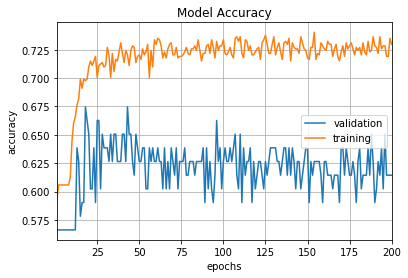

83/83 [==============================] - 0s 84us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6724287551569651, 0.614457833479686]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 1.5622 - acc: 0.5459 - val_loss: 0.8600 - val_acc: 0.6265
Epoch 2/200
 - 0s - loss: 0.7301 - acc: 0.5593 - val_loss: 0.7812 - val_acc: 0.6265
Epoch 3/200
 - 0s - loss: 0.7093 - acc: 0.5779 - val_loss: 0.7522 - val_acc: 0.6265
Epoch 4/200
 - 0s - loss: 0.6833 - acc: 0.5766 - val_loss: 0.6574 - val_acc: 0.6265
Epoch 5/200
 - 0s - loss: 0.6782 - acc: 0.5912 - val_loss: 0.7120 - val_acc: 0.4578
Epoch 6/200
 - 0s - loss: 0.6562 - acc: 0.6072 - val_loss: 0.6394 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6511 - acc: 0.6112 - val_loss: 0.6673 - val_acc: 0.6265
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5864 - acc: 0.7044 - val_loss: 0.5435 - val_acc: 0.7470
Epoch 94/200
 - 0s - loss: 0.5834 - acc: 0.7150 - val_loss: 0.5715 - val_acc: 0.6988
Epoch 95/200
 - 0s - loss: 0.5855 - acc: 0.7097 - val_loss: 0.5672 - val_acc: 0.6988
Epoch 96/200
 - 0s - loss: 0.5867 - acc: 0.7097 - val_loss: 0.5605 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5823 - acc: 0.7177 - val_loss: 0.5451 - val_acc: 0.7711
Epoch 98/200
 - 0s - loss: 0.5863 - acc: 0.6951 - val_loss: 0.5927 - val_acc: 0.7108
Epoch 99/200
 - 0s - loss: 0.5837 - acc: 0.7097 - val_loss: 0.6861 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.5859 - acc: 0.7097 - val_loss: 0.5467 - val_acc: 0.7590
Epoch 101/200
 - 0s - loss: 0.5821 - acc: 0.7164 - val_loss: 0.5808 - val_acc: 0.6988
Epoch 102/200
 - 0s - loss: 0.5927 - acc: 0.7017 - val_loss: 0.5889 - val_acc: 0.7349
Epoch 103/200
 - 0s - loss: 0.5776 - acc: 0.7204 - val_loss: 0.5645 - val_acc: 0.6988
Epoch 104/200
 - 0s - loss: 0.5857 - acc: 0.7111 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5762 - acc: 0.7137 - val_loss: 0.5395 - val_acc: 0.7711
Epoch 190/200
 - 0s - loss: 0.5779 - acc: 0.7111 - val_loss: 0.5641 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5776 - acc: 0.7137 - val_loss: 0.5470 - val_acc: 0.7711
Epoch 192/200
 - 0s - loss: 0.5820 - acc: 0.7204 - val_loss: 0.5914 - val_acc: 0.7229
Epoch 193/200
 - 0s - loss: 0.5778 - acc: 0.7124 - val_loss: 0.5788 - val_acc: 0.7108
Epoch 194/200
 - 0s - loss: 0.5791 - acc: 0.7150 - val_loss: 0.5618 - val_acc: 0.7349
Epoch 195/200
 - 0s - loss: 0.5793 - acc: 0.7084 - val_loss: 0.5549 - val_acc: 0.7229
Epoch 196/200
 - 0s - loss: 0.5731 - acc: 0.7164 - val_loss: 0.5422 - val_acc: 0.7711
Epoch 197/200
 - 0s - loss: 0.5701 - acc: 0.7217 - val_loss: 0.5590 - val_acc: 0.6988
Epoch 198/200
 - 0s - loss: 0.5790 - acc: 0.7164 - val_loss: 0.5646 - val_acc: 0.7229
Epoch 199/200
 - 0s - loss: 0.5794 - acc: 0.7111 - val_loss: 0.5489 - val_acc: 0.7470
Epoch 200/200
 - 0s - loss: 0.5786 - acc: 0.7137 - val

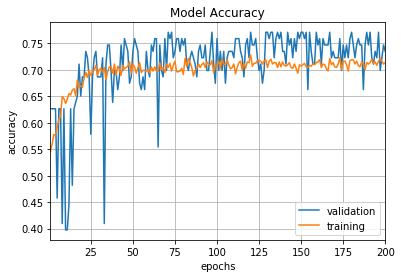

83/83 [==============================] - 0s 72us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5811061062008501, 0.7349397654992988]
 best Score: 0.8571428628194899          
-------------------------------------------------------------------------------------------




In [13]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [14]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.7323568572058341
0.7211557941593385


[0.7146666685740153,
 0.7173333366711935,
 0.7213333344459534,
 0.7266666706403097,
 0.7323568572058341,
 0.7217043932681078,
 0.7243675129232648,
 0.7097203738679898,
 0.7296937454873808,
 0.7137150485093362]

In [15]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.8571428628194899
0.7025387272606345


[[0.4484322610355559, 0.8571428628194899],
 [0.6850768781843639, 0.6904761876378741],
 [0.7736916485286894, 0.5952380923997789],
 [0.5790244880176726, 0.7500000056766328],
 [0.5830014111047768, 0.698795182159148],
 [0.5988549389034868, 0.6746987930263382],
 [0.6165688059416162, 0.6867469857974224],
 [0.5475145459893238, 0.7228915641106755],
 [0.6724287551569651, 0.614457833479686],
 [0.5811061062008501, 0.7349397654992988]]

In [16]:
kfold_validation_score_store

[[0.4484322610355559, 0.8571428628194899],
 [0.6850768781843639, 0.6904761876378741],
 [0.7736916485286894, 0.5952380923997789],
 [0.5790244880176726, 0.7500000056766328],
 [0.5830014111047768, 0.698795182159148],
 [0.5988549389034868, 0.6746987930263382],
 [0.6165688059416162, 0.6867469857974224],
 [0.5475145459893238, 0.7228915641106755],
 [0.6724287551569651, 0.614457833479686],
 [0.5811061062008501, 0.7349397654992988]]